# Parallel Coordinates

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

plt.style.use('ggplot')
np.random.seed(37)
warnings.filterwarnings('ignore')

## Basic

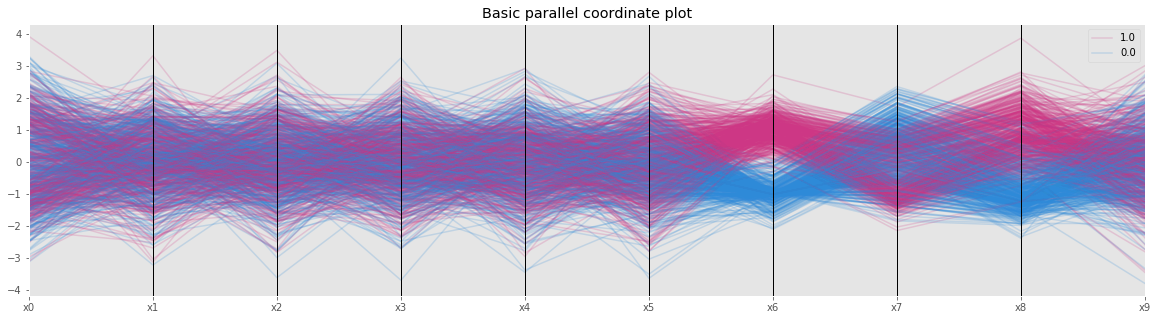

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(**{
    'n_samples': 1000,
    'n_features': 10,
    'n_informative': 2,
    'n_redundant': 2,
    'n_repeated': 0,
    'n_classes': 2,
    'n_clusters_per_class': 2,
    'random_state': 37
})

x_columns = [f'x{i}' for i in range(X.shape[1])]
y_column = ['y']
columns = x_columns + y_column

df = pd.DataFrame(np.hstack([X, y.reshape(-1, 1)]), columns=columns)

fig, ax = plt.subplots(figsize=(20, 5))

_ = pd.plotting.parallel_coordinates(df, 'y', x_columns, color=['#2e8ad8', '#cd3785'], sort_labels=True, axvlines=True, alpha=0.2, ax=ax)
_ = ax.set_title('Basic parallel coordinate plot')

## Wine data

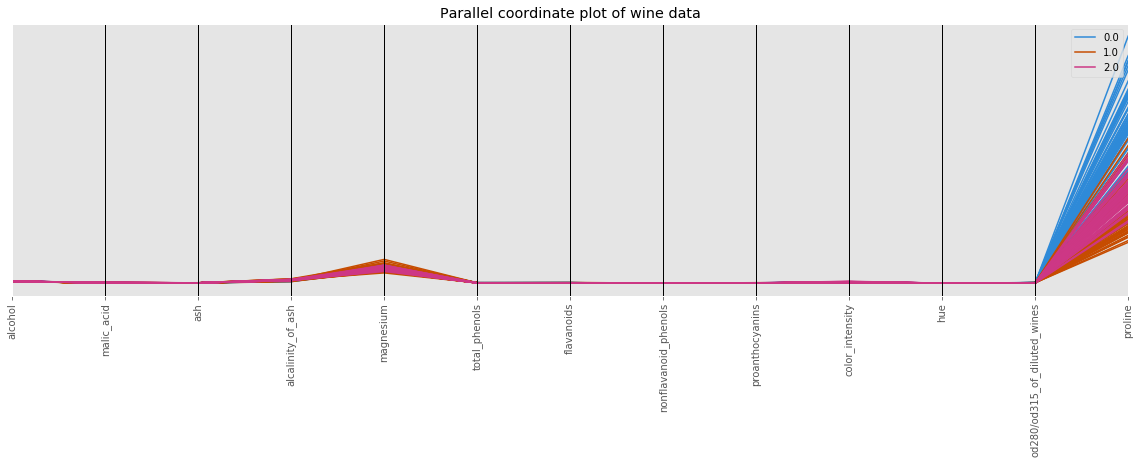

In [3]:
from sklearn.datasets import load_wine

bunch = load_wine()
data, target = bunch['data'], bunch['target']
feature_names, target_names = bunch['feature_names'], bunch['target_names']

df = pd.DataFrame(np.hstack([data, target.reshape(-1, 1)]), columns=feature_names + ['y'])

fig, ax = plt.subplots(figsize=(20, 5))

_ = pd.plotting.parallel_coordinates(df, 'y', feature_names, color=['#2e8ad8', '#cd3785', '#c64c00'], sort_labels=True, axvlines=True, ax=ax)
_ = ax.set_title('Parallel coordinate plot of wine data')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.axes.get_yaxis().set_visible(False)

## Customized plot

Taken from [https://benalexkeen.com/parallel-coordinates-in-matplotlib/](https://benalexkeen.com/parallel-coordinates-in-matplotlib/).

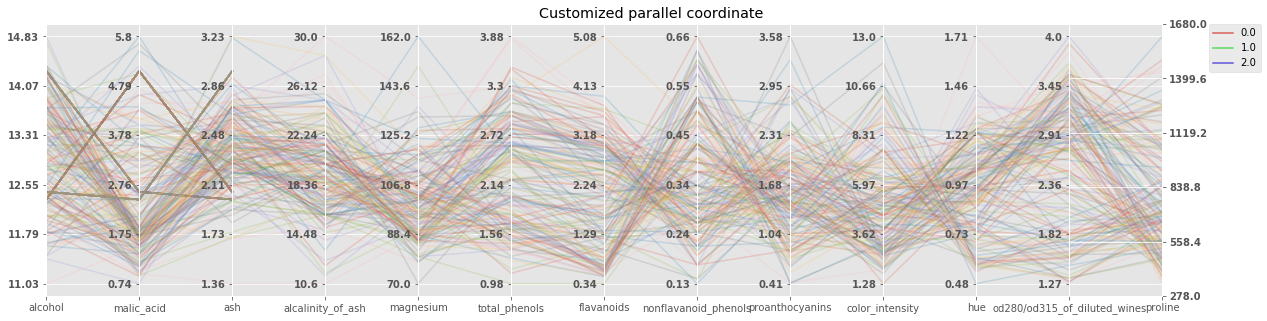

In [4]:
from matplotlib import ticker

def set_ticks_for_axis(dim, ax, ticks, ranges):
    min_val, max_val, val_range = ranges[feature_names[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    norm_min = df[feature_names[dim]].min()
    norm_range = np.ptp(df[feature_names[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    ax.yaxis.set_ticks(ticks)
    ax.set_yticklabels(tick_labels, fontdict={'fontweight': 'bold'})

def plot_parallel_coordinates(data_frame, target_name, title, ticks=6):
    # copy data frame
    df = pd.DataFrame(data_frame.values, columns=data_frame.columns)
    
    # get feature names
    feature_names = [c for c in df.columns if c != target_name]
    
    # get colors per class
    categories = df[target_name].value_counts().sort_index().index
    color_palette = sns.color_palette('hls', len(categories))
    colors = {category: color for category, color in zip(categories, color_palette)}

    # normalize data
    ranges = {}
    for col in feature_names:
        ranges[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
        df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))

    x = [i for i in range(len(feature_names))]

    fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(20,5))

    for dim, ax in enumerate(axes):
        ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
        set_ticks_for_axis(dim, ax, ticks, ranges)
        ax.set_xticklabels([feature_names[dim]])

    _ = ax = plt.twinx(axes[-1])
    dim = len(axes)
    _ = ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
    set_ticks_for_axis(dim, ax, ticks, ranges)
    _ = ax.set_xticklabels([feature_names[-2], feature_names[-1]])

    _ = plt.subplots_adjust(wspace=0)

    _ = plt.legend(
        [plt.Line2D((0,1),(0,0), color=colors[cat]) for cat in categories],
        categories,
        bbox_to_anchor=(1.5, 1), loc=2, borderaxespad=0.0)

    for i, ax in enumerate(axes):
        for idx in df.index:
            cat = df.loc[idx, target_name]
            _ = ax.plot(x, df.loc[idx, feature_names], colors[cat], alpha=0.2)
        _ = ax.set_xlim([x[i], x[i+1]])

    _ = axes[len(axes) // 2].set_title(title)
    _ = plt.tight_layout()

bunch = load_wine()

data, target = bunch['data'], bunch['target']
feature_names, target_names = bunch['feature_names'], bunch['target_names']

df = pd.DataFrame(np.hstack([data, target.reshape(-1, 1)]), columns=feature_names + ['y'])

plot_parallel_coordinates(df, 'y', 'Customized parallel coordinate')

## Occupancy data

Note that we normalize the data here and use [yellowbrick](https://www.scikit-yb.org/en/latest/index.html).

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


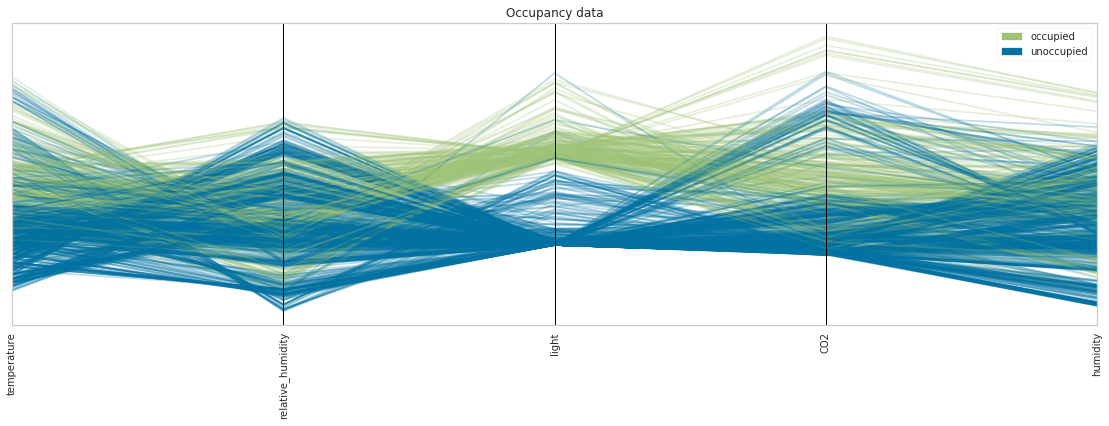

In [5]:
from yellowbrick.features import ParallelCoordinates
from yellowbrick.datasets import load_occupancy

X, y = load_occupancy()

features = ['temperature', 'relative_humidity', 'light', 'CO2', 'humidity']
classes = ['unoccupied', 'occupied']

params = {
    'classes': classes,
    'features': features,
    'sample': 0.05,
    'shuffle': True,
    'normalize': 'standard',
    'size': (1400, 400),
    'title': 'Occupancy data'
}
v = ParallelCoordinates(**params)
_ = v.fit_transform(X, y)
_ = v.ax.tick_params(axis='x', labelrotation=90.)
_ = v.ax.axes.get_yaxis().set_visible(False)
_ = v.show()